# Two dimensional Cartesian Slepians, generalized

The idea here is to use slepian_foxtrot to jumpstart an implementation of the Simons code. We should be able to then localize blobs, or splined boundaries of things in order to get the GL nodes and solve the concentration problem. 

`slepian_foxtrot` depends on `slepian_alpha`, so the routines from `slepian_alpha` that are needed have been collected in an input file. 

In [12]:
using FastGaussQuadrature, Plots, DelimitedFiles, Random
Random.seed!(123)

include("relevant_slepian_alpha.jl")

get_quadrature_nodes_2D (generic function with 3 methods)

## Random blob example

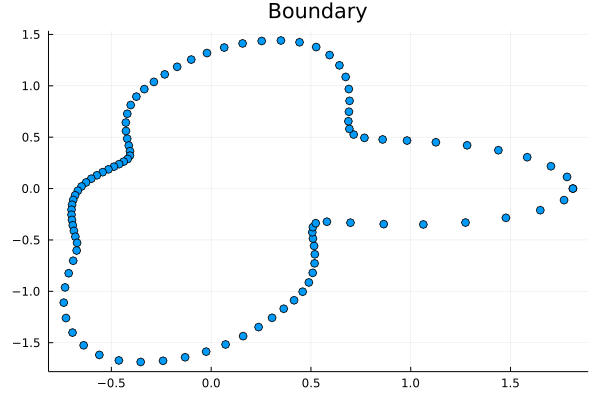

In [13]:
x, y = blob(1,1)

p = scatter(x[1], y[1],  marker = :o, title = "Boundary", legend = false)

## Get the quadrature nodes

In [14]:
QX, QY, w, Nrun = get_quadrature_nodes_2D(x[1], y[1])
no = [(x, y) for x in QX for y in QY];

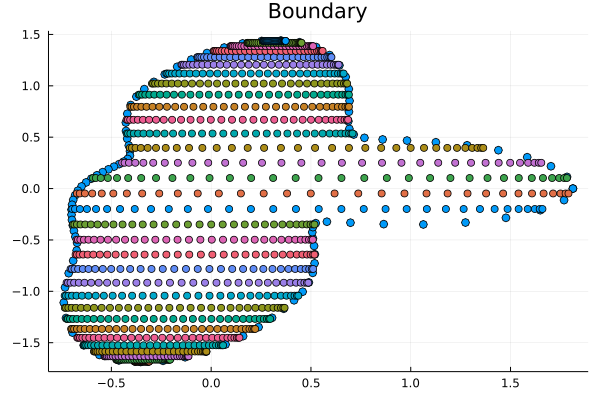

In [15]:
# Initialize the quadrature points
scatter!(p, QX, QY, legend = false)


## Rattle

How does the code set up quadrature nodes for disjoint circles?

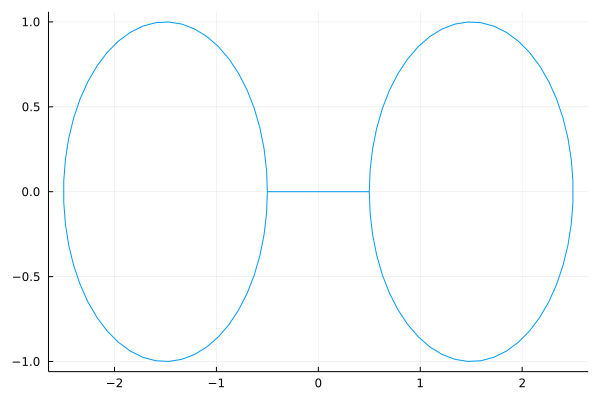

In [16]:
N = 50
t = LinRange(-pi, pi, N)
x1, y1 = (cos.(t) .+ 1.5, sin.(t))
x2, y2 = (cos.(t .+ pi) .- 1.5, sin.(t .+ pi))

x,y = (vcat(x1,x2), vcat(y1, y2))

plot(x,y, legend = false)

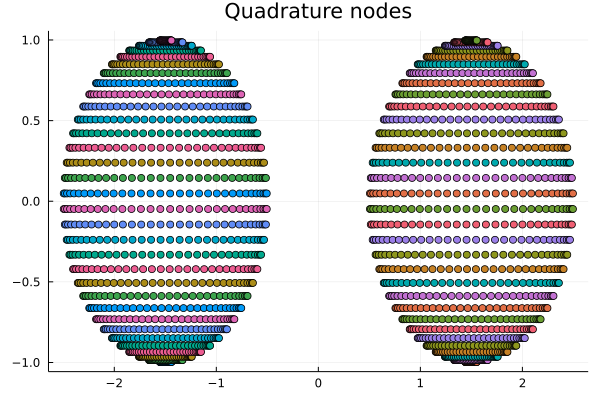

In [17]:
QX, QY, w, Nrun = get_quadrature_nodes_2D(x, y)
ps = scatter(QX, QY, legend = false, title = "Quadrature nodes")